# Imaging IO Test

Results from imaging IO test benchmarks.

In [1]:
import os, sys
from pprint import pprint
from pathlib import Path

REPO_ROOT = str(Path(os.getcwd()).parent.parent.parent)  # Repo root dir
REFRAME_ROOT = os.path.join(REPO_ROOT, 'reframe')  # ReFrame root dir
REFRAME_DEPS = os.path.join(REFRAME_ROOT, 'external')  # ReFrame dependencies
REPO_DEPS = os.path.join(REPO_ROOT, 'external')  # Repo dependencies
PERFLOG_DIR = os.path.join(REPO_ROOT, 'perflogs')  # Perflogs dir
sys.path.extend((REFRAME_ROOT, REPO_ROOT, REPO_DEPS, REFRAME_DEPS)) # the `modules` package imports `reframe` so need that in sys.modules

import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'
import modules
from reframe_config import site_configuration

# Plotting setup
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import ticker
from matplotlib.ticker import ScalarFormatter
from IPython.display import display, HTML

In [2]:
%%HTML
<style type="text/css">
table.dataframe td, table.dataframe th {
    border: 1px  black solid !important;
  color: black !important;
}
</style>

## Systems and their descriptions

The following table gives a high level overview of each partition defined in terms of architecture and configuration. The column `S:C:T` stands for **number of sockets**, **number of physical cores per socket** and **number of threads per core**. Similarly, the column `caches` indicate the cache sizes from lower to higher in bytes.

In [3]:
df = modules.utils.tabulate_partitions(root=PERFLOG_DIR)
display(HTML(df.transpose().to_html()))

## Defined benchmarks

Currently, there are 3 different variants of benchmarks
- Dry test is running the entire workflow from images to visibilities without writing the data to the disk
- Write test is dry test + writing the data to disk
- Read test is write test + read the data back from the disk

Each variant has two different sizes namely, *small* and *large*. Please refer to `reframe_iotest.py` for benchmark configuration. 

## Latest run performance metrics

All the performance metrics are tabulated from the latest benchmark run for different systems/parititons and programming environments

### Small test case results
These results correspond to small image size of the benchmark. 

The table shows results for different systems/partition/environments, variant of benchmark, different number of nodes and **small** sized benchmark.

In [4]:
test = 'ImagingIOTest*'
df = modules.utils.tabulate_last_perf(test=test,
                                     root=PERFLOG_DIR,
                                     extras=['variant', 'num_nodes', 'size'])
df = df.filter(regex=r'(.*)small')
if df is None:
    print('%s: no performance logs found' % test)
else:
    df = df.transpose() # so now cols are all, single
    display(df)

perf_var                                                                         Degrid GB/s  \
case                                               variant  num_nodes size                     
nancy-g5k:gros-icc21-impi21-eth-umod:imaging-io... dry-test 8         mid-small        27.89   
                                                                      low-small        28.20   
nancy-g5k:gros-icc21-impi21-eth-umod:imaging-io... dry-test 8         mid-small        27.47   
                                                                      low-small        28.34   
nancy-g5k:gros-gcc9-ompi4-eth-umod:imaging-iotest  dry-test 8         mid-small        37.03   
                                                                      low-small        37.29   
nancy-g5k:gros-gcc9-ompi4-eth-umod:imaging-iote... dry-test 8         mid-small        37.03   
                                                                      low-small        37.44   
jacamar-hpc-ci:grvingt-gcc9-ompi4-opa-umod:imag... dry-test 8         mid-small        64.17   
                                                                      low-small        63.38   

perf_var                                                                         Degrid Gflop  \
case                                               variant  num_nodes size                      
nancy-g5k:gros-icc21-impi21-eth-umod:imaging-io... dry-test 8         mid-small   2471589.485   
                                                                      low-small   1299256.808   
nancy-g5k:gros-icc21-impi21-eth-umod:imaging-io... dry-test 8         mid-small   2471589.485   
                                                                      low-small   1299256.806   
nancy-g5k:gros-gcc9-ompi4-eth-umod:imaging-iotest  dry-test 8         mid-small   2471589.484   
                                                                      low-small   1299256.808   
nancy-g5k:gros-gcc9-ompi4-eth-umod:imaging-iote... dry-test 8         mid-small   2471589.485   
                                                                      low-small   1299256.808   
jacamar-hpc-ci:grvingt-gcc9-ompi4-opa-umod:imag... dry-test 8         mid-small   2471589.483   
                                                                      low-small   1299256.809   

perf_var                                                                         Degrid Gflop/s  \
case                                               variant  num_nodes size                        
nancy-g5k:gros-icc21-impi21-eth-umod:imaging-io... dry-test 8         mid-small          2064.2   
                                                                      low-small          2087.0   
nancy-g5k:gros-icc21-impi21-eth-umod:imaging-io... dry-test 8         mid-small          2033.8   
                                                                      low-small          2096.7   
nancy-g5k:gros-gcc9-ompi4-eth-umod:imaging-iotest  dry-test 8         mid-small          2739.4   
                                                                      low-small          2759.9   
nancy-g5k:gros-gcc9-ompi4-eth-umod:imaging-iote... dry-test 8         mid-small          2740.2   
                                                                      low-small          2771.2   
jacamar-hpc-ci:grvingt-gcc9-ompi4-opa-umod:imag... dry-test 8         mid-small          4748.2   
                                                                      low-small          4688.8   

perf_var                                                                         FFT Gflop  \
case                                               variant  num_nodes size                   
nancy-g5k:gros-icc21-impi21-eth-umod:imaging-io... dry-test 8         mid-small   2197.652   
                                                                      low-small    861.437   
nancy-g5k:gros-icc21-impi21-eth-umod:imaging-io... dry-test 8         mid-small   2196.910   
                       

### Large test case results
These results correspond to small image size of the benchmark. 

The table shows results for different systems/partition/environments, variant of benchmark, different number of cores and **large** sized benchmark

In [5]:
df = modules.utils.tabulate_last_perf(test='ImagingIOTest*',
                                     root=PERFLOG_DIR,
                                     extras=['variant', 'num_nodes', 'size'])
df = df.filter(regex=r'(.*)large')
if df is None:
    print('%s: no performance logs found' % test)
else:
    df = df.transpose() # so now cols are all, single
    display(df)

perf_var                                                                         Degrid GB/s  \
case                                               variant  num_nodes size                     
nancy-g5k:gros-icc21-impi21-eth-umod:imaging-io... dry-test 32        low-large        49.32   
                                                                      mid-large        32.47   
nancy-g5k:gros-icc21-impi21-eth-umod:imaging-io... dry-test 32        low-large        49.24   
                                                                      mid-large        32.78   
nancy-g5k:gros-gcc9-ompi4-eth-umod:imaging-iotest  dry-test 32        low-large        54.51   
                                                                      mid-large        53.88   
nancy-g5k:gros-gcc9-ompi4-eth-umod:imaging-iote... dry-test 32        low-large        54.70   
                                                                      mid-large        54.44   
jacamar-hpc-ci:grvingt-gcc9-ompi4-opa-umod:imag... dry-test 16        mid-large        47.58   
                                                                      low-large        46.33   

perf_var                                                                         Degrid Gflop  \
case                                               variant  num_nodes size                      
nancy-g5k:gros-icc21-impi21-eth-umod:imaging-io... dry-test 32        low-large   1299260.668   
                                                                      mid-large   3162768.710   
nancy-g5k:gros-icc21-impi21-eth-umod:imaging-io... dry-test 32        low-large   1299260.669   
                                                                      mid-large   3162768.710   
nancy-g5k:gros-gcc9-ompi4-eth-umod:imaging-iotest  dry-test 32        low-large   1299260.668   
                                                                      mid-large   3162768.709   
nancy-g5k:gros-gcc9-ompi4-eth-umod:imaging-iote... dry-test 32        low-large   1299260.667   
                                                                      mid-large   3162768.712   
jacamar-hpc-ci:grvingt-gcc9-ompi4-opa-umod:imag... dry-test 16        mid-large   3162768.708   
                                                                      low-large   1299260.670   

perf_var                                                                         Degrid Gflop/s  \
case                                               variant  num_nodes size                        
nancy-g5k:gros-icc21-impi21-eth-umod:imaging-io... dry-test 32        low-large          3648.8   
                                                                      mid-large          2399.7   
nancy-g5k:gros-icc21-impi21-eth-umod:imaging-io... dry-test 32        low-large          3644.6   
                                                                      mid-large          2425.4   
nancy-g5k:gros-gcc9-ompi4-eth-umod:imaging-iotest  dry-test 32        low-large          4032.5   
                                                                      mid-large          3988.3   
nancy-g5k:gros-gcc9-ompi4-eth-umod:imaging-iote... dry-test 32        low-large          4045.6   
                                                                      mid-large          4031.2   
jacamar-hpc-ci:grvingt-gcc9-ompi4-opa-umod:imag... dry-test 16        mid-large          3521.0   
                                                                      low-large          3427.1   

perf_var                                                                          FFT Gflop  \
case                                               variant  num_nodes size                    
nancy-g5k:gros-icc21-impi21-eth-umod:imaging-io... dry-test 32        low-large   70350.691   
                                                                      mid-large  186992.991   
nancy-g5k:gros-icc21-impi21-eth-umod:imaging-io... dry-test 32        low-large   70319.905   
                  

## Scalability results

The plot shows the scalability of the benchmark when running from 512 to 8192 cores on different system/partition/environment combination. The results are only for the **latest** tests

In [6]:
# Drive function to plot scalability results
def plot_scalability_tests(size, variant, perf_vars):
    def set_axis_labels(ax, ya_name):
        ax.set_xlabel('Number of cores')
        ax.set_ylabel(ya_name)
        ax.grid()
    perf_records = modules.utils.load_perf_logs(root=PERFLOG_DIR, test='ImagingIOTest*', extras=['num_cores'], last=True)
    if perf_records is None:
        print('%s: no performance logs found' % test)
        return
    nperf_vars = len(perf_vars)
    fig, ax = plt.subplots(nrows=1, ncols=nperf_vars, sharex=True, figsize=(6 * nperf_vars, 6))
    fig.suptitle("{} size and {} variant".format(size, variant), fontsize=14)
    for spe, data in perf_records.groupby(['sysname', 'partition', 'environ']):
        # filter to only Gflops records (might have others)
        for iperf_var, perf_var in enumerate(perf_vars):
            data_dg = data.loc[(data['perf_var'] == perf_var) & (data['variant'] == variant) & (data['size'] == size)]
            data_dg.plot(ax=ax[iperf_var], x='num_cores', y='perf_value', style=['o-'], label='-'.join(spe), legend=None)
            set_axis_labels(ax[iperf_var], perf_var)
            handles, labels = ax[iperf_var].get_legend_handles_labels()
    fig.legend(handles, labels, bbox_to_anchor=(1.05, 1), loc='upper left')

### Dry-test

The following results show scalability for dry-test benchmarks

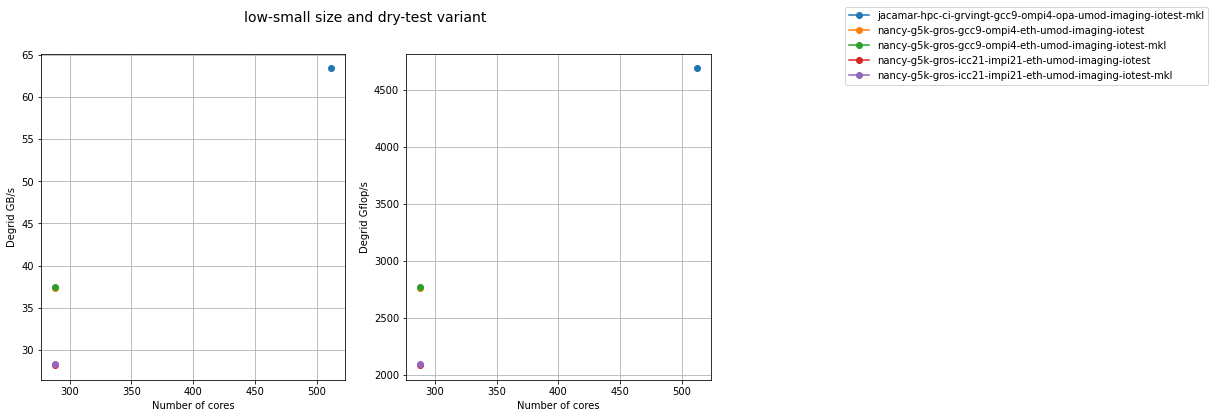

In [7]:
plot_scalability_tests(size='low-small', variant='dry-test', perf_vars=['Degrid GB/s', 'Degrid Gflop/s'])

### Write-test

The following results show scalability for write-test benchmarks

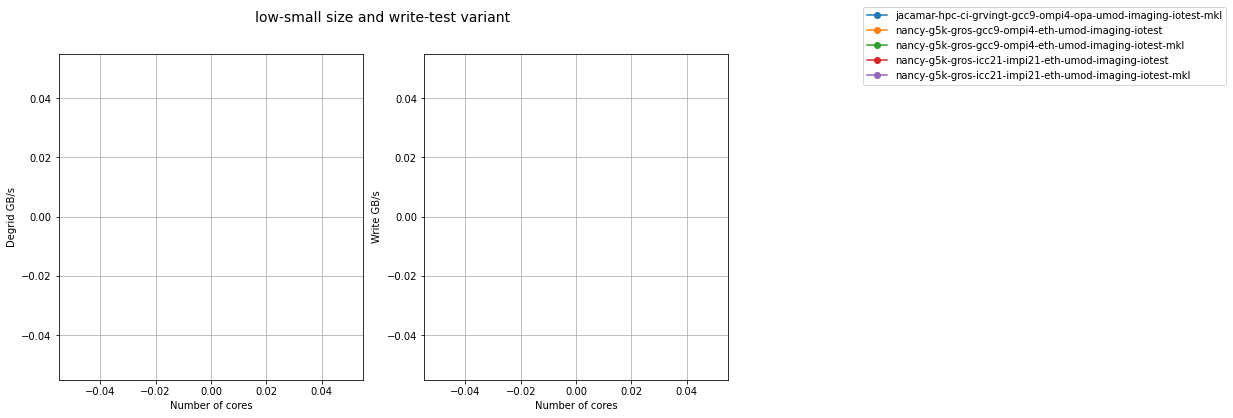

In [8]:
plot_scalability_tests(size='low-small', variant='write-test', perf_vars=['Degrid GB/s', 'Write GB/s'])

### Read-test

The following results show scalability for read-test benchmarks

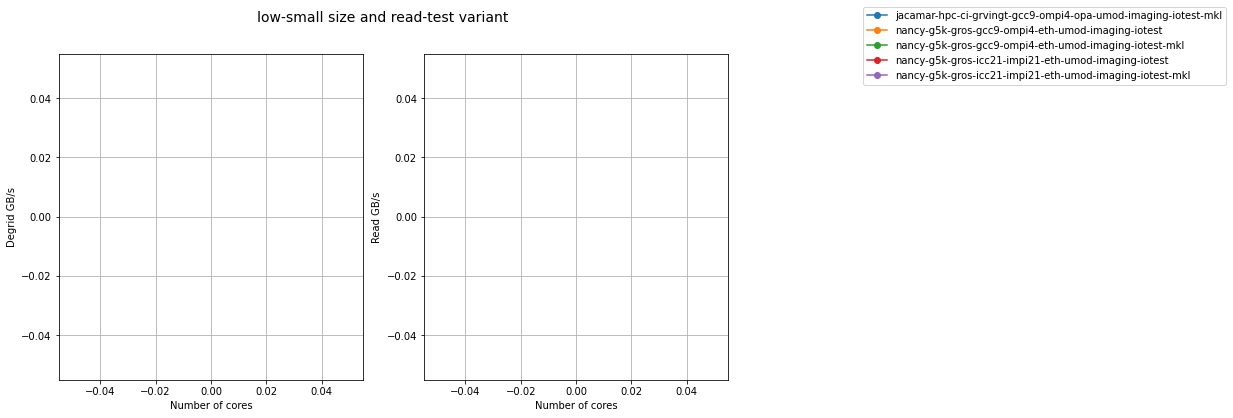

In [9]:
plot_scalability_tests(size='low-small', variant='read-test', perf_vars=['Degrid GB/s', 'Read GB/s'])

## Performance History

The plot shows the Degrid rate, write and read bandwidths for each system/partition/environment combination. The performance logs include a git reference (as a tag "git=<ref>") to refer the state of repository when the test was performed. Besides, there is one more tag `git_src` which gives the state of repository of source code of Imaging IO test. Using these two tags, we should be able to reporduce the test results on a given platform.

In [10]:
def plot_perf_history(test):
    perf_records = modules.utils.load_perf_logs(root=PERFLOG_DIR, test=test)
    if perf_records is None:
        print('%s: no performance logs found' % test)
    else:
        fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 6))
        for spe, data in perf_records.groupby(['sysname', 'partition', 'environ']):
            # filter to only Gflops records (might have others)
            data = data.loc[data['perf_var'] == 'Degrid GB/s']
            data.plot(ax=ax, x='completion_time', y='perf_value', style=['o-'], label='-'.join(spe), legend=None)

            # annotate points with git_ref:
            for x, y, ref in zip(data['completion_time'], data['perf_value'], data['git']):
                if not pd.isnull(ref):
                    ax.annotate(ref[:7], (x, y))
        ax.set_title(test)
        ax.set_xlabel('completion time')
        ax.set_ylabel('Degrid [GB/s]')
        ax.grid()
        handles, labels = ax.get_legend_handles_labels()
        fig.legend(handles, labels, bbox_to_anchor=(1.05, 1), loc='upper left')

### SKA1 LOW Large image size with 16 nodes and dry test

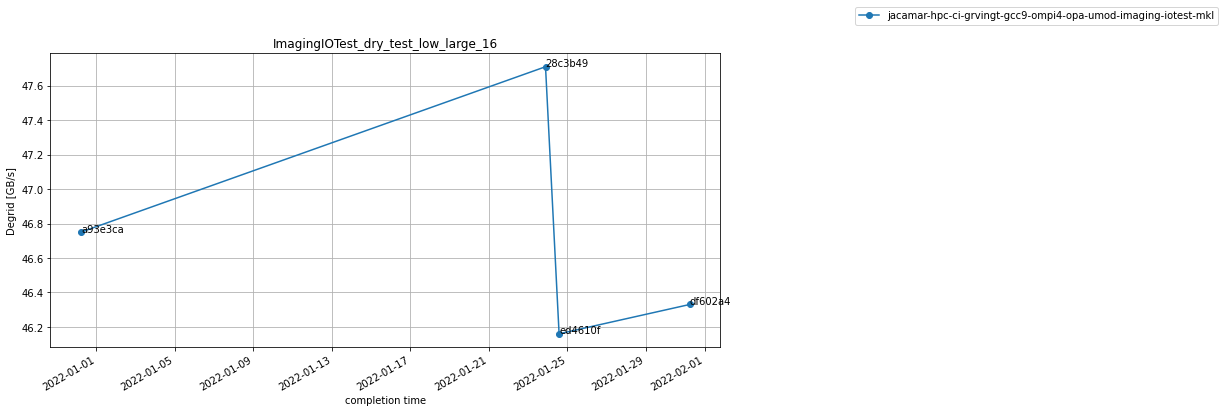

In [11]:
plot_perf_history(test='ImagingIOTest_dry_test_low_large_16')

### SKA1 MID Large image size with 16 nodes and dry test

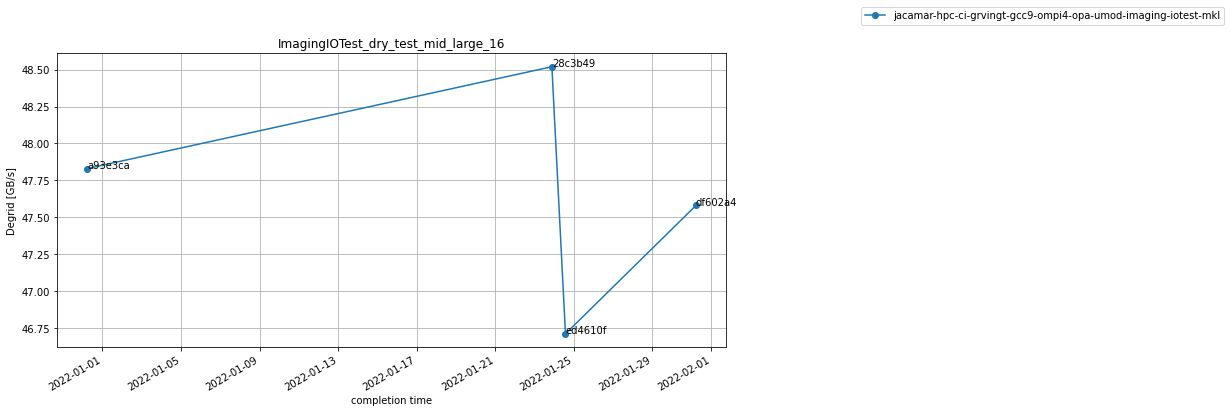

In [12]:
plot_perf_history(test='ImagingIOTest_dry_test_mid_large_16')